In [34]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("/content/chip_dataset.csv")

In [7]:
df.head(20)

,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (GHz),Foundry,Vendor,FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
0,AMD Athlon 1000,CPU,6/5/00,180,54,120,37,1000.0,NaN,AMD,NaN,NaN,NaN
1,AMD Athlon 1000,CPU,10/31/00,180,54,120,37,1000.0,NaN,AMD,NaN,NaN,NaN
2,AMD Athlon 1100,CPU,8/14/00,180,60,120,37,1100.0,NaN,AMD,NaN,NaN,NaN
3,AMD Athlon 1133,CPU,10/31/00,180,63,120,37,1133.0,NaN,AMD,NaN,NaN,NaN
4,AMD Athlon 1200,CPU,10/31/00,180,66,120,37,1200.0,NaN,AMD,NaN,NaN,NaN
5,AMD Athlon 1200,CPU,10/17/00,180,66,120,37,1200.0,NaN,AMD,NaN,NaN,NaN
6,AMD Athlon 600,CPU,6/5/00,180,38,120,37,600.0,NaN,AMD,NaN,NaN,NaN
7,AMD Athlon 650,CPU,6/5/00,180,38,120,37,650.0,NaN,AMD,NaN,NaN,NaN
8,AMD Athlon 700,CPU,6/5/00,180,40,120,37,700.0,NaN,AMD,NaN,NaN,NaN
9,AMD Athlon 750,CPU,6/5/00,180,43,120,37,750.0,NaN,AMD,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4945 entries, 0 to 4944
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Product                4945 non-null   object 
 1   Type                   4945 non-null   object 
 2   Release Date           4746 non-null   object 
 3   Process Size (nm)      4945 non-null   object 
 4   TDP (W)                4508 non-null   object 
 5   Die Size (mm^2)        4593 non-null   object 
 6   Transistors (million)  4390 non-null   object 
 7   Freq (GHz)             4508 non-null   float64
 8   Foundry                4330 non-null   object 
 9   Vendor                 4945 non-null   object 
 10  FP16 GFLOPS            800 non-null    float64
 11  FP32 GFLOPS            1685 non-null   float64
 12  FP64 GFLOPS            1278 non-null   float64
dtypes: float64(4), object(9)
memory usage: 502.4+ KB


In [6]:
df.isnull().sum()

Product                     0
Type                        0
Release Date              199
Process Size (nm)           0
TDP (W)                   437
Die Size (mm^2)           352
Transistors (million)     555
Freq (GHz)                437
Foundry                   615
Vendor                      0
FP16 GFLOPS              4145
FP32 GFLOPS              3260
FP64 GFLOPS              3667
dtype: int64

I dropped the last three columns because i felt that they werent informing anything.

In [10]:
Data= df.drop(['FP16 GFLOPS','FP32 GFLOPS','FP64 GFLOPS'],axis=1)
Data.head()

,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (GHz),Foundry,Vendor
0,AMD Athlon 1000,CPU,6/5/00,180,54,120,37,1000.0,NaN,AMD
1,AMD Athlon 1000,CPU,10/31/00,180,54,120,37,1000.0,NaN,AMD
2,AMD Athlon 1100,CPU,8/14/00,180,60,120,37,1100.0,NaN,AMD
3,AMD Athlon 1133,CPU,10/31/00,180,63,120,37,1133.0,NaN,AMD
4,AMD Athlon 1200,CPU,10/31/00,180,66,120,37,1200.0,NaN,AMD


#For cleaning i used the mode and mean to work on the missingness.

In [18]:
Data['Foundry']= Data['Foundry'].fillna(Data['Foundry'].mode()[0])
Data['Transistors (million)']= Data['Transistors (million)'].fillna(Data['Transistors (million)'].mode()[0])
Data['Die Size (mm^2)']= Data['Die Size (mm^2)'].fillna(Data['Die Size (mm^2)'].mode()[0])
Data['TDP (W)']= Data['TDP (W)'].fillna(Data['TDP (W)'].mode()[0])
Data['Release Date']= Data['Release Date'].fillna(Data['Release Date'].mode()[0])
Data.isnull().sum()

Product                  0
Type                     0
Release Date             0
Process Size (nm)        0
TDP (W)                  0
Die Size (mm^2)          0
Transistors (million)    0
Freq (GHz)               0
Foundry                  0
Vendor                   0
dtype: int64

In [15]:
Data['Freq (GHz)']= Data['Freq (GHz)'].fillna(Data['Freq (GHz)'].mean())
Data.isnull().sum()

Product                  0
Type                     0
Release Date             0
Process Size (nm)        0
TDP (W)                  0
Die Size (mm^2)          0
Transistors (million)    0
Freq (GHz)               0
Foundry                  0
Vendor                   0
dtype: int64

In [16]:
Data.head()

,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (GHz),Foundry,Vendor
0,AMD Athlon 1000,CPU,6/5/00,180,54,120,37,1000.0,TSMC,AMD
1,AMD Athlon 1000,CPU,10/31/00,180,54,120,37,1000.0,TSMC,AMD
2,AMD Athlon 1100,CPU,8/14/00,180,60,120,37,1100.0,TSMC,AMD
3,AMD Athlon 1133,CPU,10/31/00,180,63,120,37,1133.0,TSMC,AMD
4,AMD Athlon 1200,CPU,10/31/00,180,66,120,37,1200.0,TSMC,AMD


Transform temporal data to their corrrect format (date time)

In [23]:
Data['Release Date'] = pd.to_datetime(Data['Release Date'])
Data

,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (GHz),Foundry,Vendor
0,AMD Athlon 1000,CPU,2000-06-05,180,54,120,37,1000.0,TSMC,AMD
1,AMD Athlon 1000,CPU,2000-10-31,180,54,120,37,1000.0,TSMC,AMD
2,AMD Athlon 1100,CPU,2000-08-14,180,60,120,37,1100.0,TSMC,AMD
3,AMD Athlon 1133,CPU,2000-10-31,180,63,120,37,1133.0,TSMC,AMD
4,AMD Athlon 1200,CPU,2000-10-31,180,66,120,37,1200.0,TSMC,AMD
...,...,...,...,...,...,...,...,...,...,...
4940,NVIDIA GeForce RTX 3050 6 GB,GPU,2013-09-01,8,80,200,8700,1042.0,Samsung,NVIDIA
4941,NVIDIA GeForce RTX 4070 SUPER,GPU,2024-01-08,5,220,294,35800,1980.0,TSMC,NVIDIA
4942,NVIDIA GeForce RTX 4070 Ti SUPER,GPU,2024-01-08,5,285,379,45900,2340.0,TSMC,NVIDIA
4943,NVIDIA GeForce RTX 4080 SUPER,GPU,2024-01-08,5,320,379,45900,2295.0,TSMC,NVIDIA


#Perfom a full EDA and demonstrate the validity of the following assumptions

In [ ]:
Data['Year'] = Data['Release Date'].dt.year
Data.groupby('Year')['Transistors (million)'].mean().plot(kind='line', marker='o', title="Moore's Law: Transistor Count Over Time")
plt.show()

In [ ]:
# Dennard Scaling: Power density trend over time
# Assuming TDP (Thermal Design Power) as a proxy for power density
Data.groupby('Year')['TDP (W)'].mean().plot(kind='line', marker='o', title="Dennard Scaling: TDP Over Time")
plt.show()

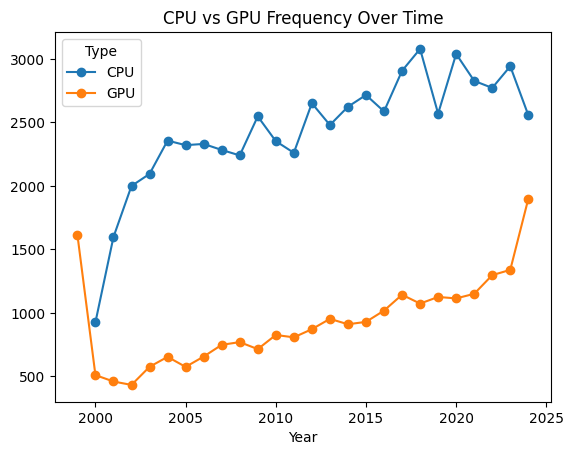

In [28]:
# CPU and GPU Frequency comparison over time
Data.groupby(['Year', 'Type'])['Freq (GHz)'].mean().unstack().plot(kind='line', marker='o', title="CPU vs GPU Frequency Over Time")
plt.show()

#Calculate and visualized the correlation among the features

<ipython-input-33-377d739e19d9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


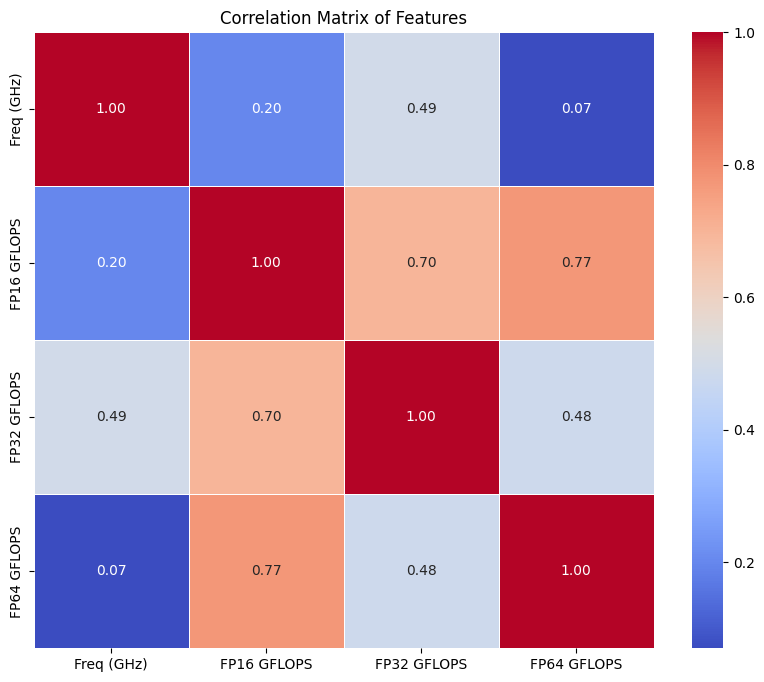

In [33]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Features')
plt.show()

#Perfom the correct encoding for your data, in readiness for modelling.